In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("strong_bias_data.csv")
# data = pd.read_csv("leukemia.csv")
# from lifelines.datasets import load_rossi, load_kidney_transplant
# data = load_rossi()
# data = load_kidney_transplant()

In [3]:
data.columns

Index(['sex', 'drug', 'time', 'status'], dtype='object')

In [4]:
data.describe()

,sex,drug,time,status
count,198.000000,198.000000,198.000000,198.0
mean,0.510101,0.500000,13.566776,1.0
std,0.501165,0.501267,10.300234,0.0
min,0.000000,0.000000,5.133592,1.0
25%,0.000000,0.000000,6.842412,1.0
50%,1.000000,0.500000,9.036419,1.0
75%,1.000000,1.000000,16.027722,1.0
max,1.000000,1.000000,48.193661,1.0


In [5]:
col_Z = 'sex' # 'race''paro''mar'
col_X = 'drug' # fin
col_time = 'time' # week
col_status = 'status' # arrest
max_time = int(data[col_time].max())

In [6]:
print("X=0:", data[(data[col_X] == 0)].shape[0])
print("X=1:", data[(data[col_X] == 1)].shape[0])
print("Z=0:", data[(data[col_Z] == 0)].shape[0])
print("Z=1:", data[(data[col_Z] == 1)].shape[0])

X=0: 99
X=1: 99
Z=0: 97
Z=1: 101


In [7]:
def label_survival(row, index):
    if ((row[col_time] <= (index + 0.5)) & (row[col_status] == 1)): # time
        return 1
    return 0

In [8]:
for i in range(max_time):
    col_name = 'Y' + str(i)
    data[col_name] = data.apply(lambda row: label_survival(row, i), axis=1)

In [9]:
data
#data[['Y24', 'Y25', 'Y26', 'Y27', 'Y28', 'Y29']]

,sex,drug,time,status,Y0,Y1,Y2,Y3,Y4,Y5,...,Y38,Y39,Y40,Y41,Y42,Y43,Y44,Y45,Y46,Y47
0,0.0,1.0,9.210960,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0.0,0.0,9.046520,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0.0,1.0,9.162155,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1.0,0.0,13.307622,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1.0,0.0,10.194486,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,1.0,1.0,9.119665,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
194,0.0,1.0,5.488753,1.0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
195,0.0,1.0,6.353292,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
196,0.0,0.0,6.573695,1.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


---

In [10]:
# lets pick sex, drug, Y0
col_name = 'Y45'
subdata = data[[col_Z, col_X, col_name]] # sex, drug
subdata = subdata.rename(columns={col_Z: "Z", col_X: "X"}) # sex, drug
subdata["X"]= subdata["X"].astype(int) 
subdata["Z"]= subdata["Z"].astype(int) 
subdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
Z      198 non-null int64
X      198 non-null int64
Y45    198 non-null int64
dtypes: int64(3)
memory usage: 4.8 KB


In [11]:
subdata

,Z,X,Y45
0,0,1,1
1,0,0,1
2,0,1,1
3,1,0,1
4,1,0,1
...,...,...,...
193,1,1,1
194,0,1,1
195,0,1,1
196,0,0,1


In [12]:
subdata_counted = pd.DataFrame(columns=['Z', 'X', col_name, 'c', 'p'])
population_count = subdata.shape[0]

for i in range(2):
    for j in range(2):
        for k in range(2):
            count = subdata[(subdata['Z'] == i) & (subdata['X'] == j) & (subdata[col_name] == k)].shape[0]
            subdata_counted.loc[2*2*i+2*j+k] = [i, j, k, count, count/population_count]
            
subdata_counted

,Z,X,Y45,c,p
0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,1.0,24.0,0.121212
2,0.0,1.0,0.0,0.0,0.000000
3,0.0,1.0,1.0,73.0,0.368687
4,1.0,0.0,0.0,1.0,0.005051
5,1.0,0.0,1.0,74.0,0.373737
6,1.0,1.0,0.0,1.0,0.005051
7,1.0,1.0,1.0,25.0,0.126263


In [13]:
ipw = []

for i in range(2):
    for j in range(2):
        x = i
        z = j
        p_xz = subdata[(subdata['Z'] == z) & (subdata['X'] == x)].shape[0]
        p_z = subdata[(subdata['Z'] == z)].shape[0]
        if (p_z == 0):
            p_x_given_z = 1
        else:
            p_x_given_z = p_xz / p_z
        ipw.append(p_x_given_z)

ipw

[0.24742268041237114,
 0.7425742574257426,
 0.7525773195876289,
 0.25742574257425743]

In [14]:
# subdata[(subdata['Z'] == 0) & (subdata['X'] == 0)].shape[0]
# subdata[(subdata['Z'] == 0)].shape[0]

In [15]:
def get_adj_p(row):
    return row['p'] / ipw[(int) (row['X'] * 2 + row['Z'])]

In [16]:
subdata_counted['p_adj'] = subdata_counted.apply(lambda row: get_adj_p(row), axis=1)
subdata_counted

,Z,X,Y45,c,p,p_adj
0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,1.0,24.0,0.121212,0.489899
2,0.0,1.0,0.0,0.0,0.000000,0.000000
3,0.0,1.0,1.0,73.0,0.368687,0.489899
4,1.0,0.0,0.0,1.0,0.005051,0.006801
5,1.0,0.0,1.0,74.0,0.373737,0.503300
6,1.0,1.0,0.0,1.0,0.005051,0.019619
7,1.0,1.0,1.0,25.0,0.126263,0.490482


In [17]:
subdata_counted['c_adj'] = (population_count/2) * subdata_counted['p_adj']
subdata_counted

,Z,X,Y45,c,p,p_adj,c_adj
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,1.0,24.0,0.121212,0.489899,48.500000
2,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,1.0,1.0,73.0,0.368687,0.489899,48.500000
4,1.0,0.0,0.0,1.0,0.005051,0.006801,0.673333
5,1.0,0.0,1.0,74.0,0.373737,0.503300,49.826667
6,1.0,1.0,0.0,1.0,0.005051,0.019619,1.942308
7,1.0,1.0,1.0,25.0,0.126263,0.490482,48.557692


---

In [18]:
backup = data.copy()
# data = backup.copy()

In [19]:
ipw = []
population_count = data.shape[0]

def get_adj_p(row, index):
        return row['p_'+str(index)] / ipw[(int) (row['X'] * 2 + row['Z'])]
    
clustered_data = pd.DataFrame(columns=['Z', 'X', 'Y']) # c0, p0, c_adj_0, p_adj_0
for i in range(2):
    for j in range(2):
        for k in range(2):
            clustered_data.loc[2*2*i+2*j+k] = [i, j, k]

for m in range(max_time): # 45, 46
    
    col_name = 'Y' + str(m)
    clustered_data['c_' + str(m)] = 0
    
    for i in range(2):
        for j in range(2):
            for k in range(2):
                clustered_data.at[2*2*i+2*j+k, 'c_' + str(m)] = data[(data[col_Z] == i) & (data[col_X] == j) & (data[col_name] == k)].shape[0]

    clustered_data['p_' + str(m)] = clustered_data['c_' + str(m)] / population_count
            
    ipw = []

    for i in range(2):
        for j in range(2):
            p_xz = data[(data[col_Z] == j) & (data[col_X] == i)].shape[0]
            p_z = data[(data[col_Z] == j)].shape[0]
            if (p_z == 0):
                p_x_given_z = 1
            else:
                p_x_given_z = p_xz / p_z
            ipw.append(p_x_given_z)
    
    clustered_data['p_adj_'+str(m)] = clustered_data.apply(lambda row: get_adj_p(row, m), axis=1)
    clustered_data['c_adj_'+str(m)] = (population_count/2) * clustered_data['p_adj_'+str(m)]
    
print(ipw)

[0.24742268041237114, 0.7425742574257426, 0.7525773195876289, 0.25742574257425743]


In [20]:
clustered_data

,Z,X,Y,c_0,p_0,p_adj_0,c_adj_0,c_1,p_1,p_adj_1,...,p_adj_45,c_adj_45,c_46,p_46,p_adj_46,c_adj_46,c_47,p_47,p_adj_47,c_adj_47
0,0,0,0,24,0.121212,0.489899,48.5,24,0.121212,0.489899,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
1,0,0,1,0,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.489899,48.500000,24,0.121212,0.489899,48.500000,24,0.121212,0.489899,48.500000
2,0,1,0,73,0.368687,0.489899,48.5,73,0.368687,0.489899,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
3,0,1,1,0,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.489899,48.500000,73,0.368687,0.489899,48.500000,73,0.368687,0.489899,48.500000
4,1,0,0,75,0.378788,0.510101,50.5,75,0.378788,0.510101,...,0.006801,0.673333,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
5,1,0,1,0,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.503300,49.826667,75,0.378788,0.510101,50.500000,75,0.378788,0.510101,50.500000
6,1,1,0,26,0.131313,0.510101,50.5,26,0.131313,0.510101,...,0.019619,1.942308,1,0.005051,0.019619,1.942308,1,0.005051,0.019619,1.942308
7,1,1,1,0,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.490482,48.557692,25,0.126263,0.490482,48.557692,25,0.126263,0.490482,48.557692


In [21]:
print("X=0:", data[(data[col_X] == 0)].shape[0])
print("X=1:", data[(data[col_X] == 1)].shape[0])
print("Z=0:", data[(data[col_Z] == 0)].shape[0])
print("Z=1:", data[(data[col_Z] == 1)].shape[0])

X=0: 99
X=1: 99
Z=0: 97
Z=1: 101


In [22]:
a = clustered_data[(clustered_data['X'] == 0) & (clustered_data['Y'] == 0)]['c_45'].sum()
print(a)
b = clustered_data[(clustered_data['X'] == 0)]['c_45'].sum()
print(b)
print("count:", a/b) 

1
99
count: 0.010101010101010102


In [23]:
a = clustered_data[(clustered_data['X'] == 0) & (clustered_data['Y'] == 0)]['p_45'].sum()
print(a)
b = clustered_data[(clustered_data['X'] == 0)]['p_45'].sum()
print(b)
print("probablities:", a/b) 

0.005050505050505051
0.5
probablities: 0.010101010101010102


In [24]:
a = clustered_data[(clustered_data['X'] == 0) & (clustered_data['Y'] == 0)]['p_adj_45'].sum()
print(a)
b = clustered_data[(clustered_data['X'] == 0)]['p_adj_45'].sum()
print(b)
print("adjusted:", a/b) 

0.006801346801346802
1.0
adjusted: 0.006801346801346802


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


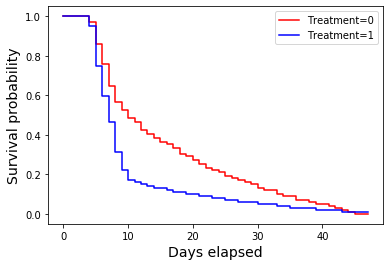

In [41]:
t = []
x0 = []
x1 = []

for i in range(max_time):
    t.append(i)
    
    a = clustered_data[(clustered_data['X'] == 0) & (clustered_data['Y'] == 0)]['p_'+str(i)].sum()
    b = clustered_data[(clustered_data['X'] == 0)]['p_'+str(i)].sum()
    x0.append(a/b)
    
    a = clustered_data[(clustered_data['X'] == 1) & (clustered_data['Y'] == 0)]['p_'+str(i)].sum()
    b = clustered_data[(clustered_data['X'] == 1)]['p_'+str(i)].sum()
    x1.append(a/b)

plt.figure()
plt.step(t, x0, 'r', label='Treatment=0') # plotting t, a separately 
plt.step(t, x1, 'b', label='Treatment=1') # plotting t, b separately 
plt.legend()
plt.xlabel('Days elapsed', fontsize=14)
plt.ylabel('Survival probability', fontsize=14)
# plt.show() 
plt.savefig('unadjusted.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


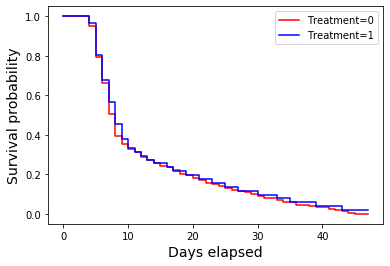

In [40]:
t = []
x0_adj = []
x1_adj = []

for i in range(max_time):
    t.append(i)
    
    a = clustered_data[(clustered_data['X'] == 0) & (clustered_data['Y'] == 0)]['p_adj_'+str(i)].sum()
    b = clustered_data[(clustered_data['X'] == 0)]['p_adj_'+str(i)].sum()
    x0_adj.append(a/b)
    
    a = clustered_data[(clustered_data['X'] == 1) & (clustered_data['Y'] == 0)]['p_adj_'+str(i)].sum()
    b = clustered_data[(clustered_data['X'] == 1)]['p_adj_'+str(i)].sum()
    x1_adj.append(a/b)

plt.figure()
plt.step(t, x0_adj, 'r', label='Treatment=0') # plotting t, a separately 
plt.step(t, x1_adj, 'b', label='Treatment=1') # plotting t, b separately 
plt.legend()
plt.xlabel('Days elapsed', fontsize=14)
plt.ylabel('Survival probability', fontsize=14)
# plt.show() 
plt.savefig('adjusted.eps', format='eps')

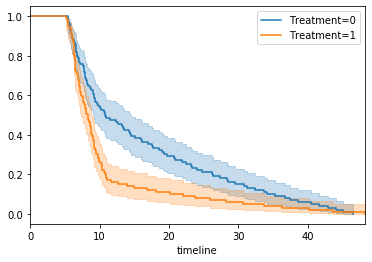

In [27]:
from lifelines import KaplanMeierFitter

ix = (data[col_X] == 1)

kmf = KaplanMeierFitter()
kmf.fit(data[col_time][~ix], data[col_status][~ix], label='Treatment=0')
ax = kmf.plot_survival_function()

kmf = KaplanMeierFitter()
kmf.fit(data[col_time][ix], data[col_status][ix], label='Treatment=1')
ax = kmf.plot_survival_function(ax=ax)

In [28]:
print('x1\tx1_adj\tdiff')
print('------\t------\t------')
for i in range(len(x1)):
    print('%.4f'%x1[i], '%.4f'%x1_adj[i], '%.4f'%(x1[i]-x1_adj[i]), sep="\t")

x1	x1_adj	diff
------	------	------
1.0000	1.0000	0.0000
1.0000	1.0000	0.0000
1.0000	1.0000	0.0000
1.0000	1.0000	0.0000
1.0000	1.0000	0.0000
0.9495	0.9664	-0.0170
0.7475	0.8064	-0.0589
0.5960	0.6799	-0.0840
0.4646	0.5669	-0.1022
0.3131	0.4533	-0.1402
0.2222	0.3800	-0.1578
0.1717	0.3335	-0.1618
0.1616	0.3139	-0.1523
0.1515	0.2943	-0.1428
0.1414	0.2747	-0.1333
0.1313	0.2551	-0.1237
0.1313	0.2551	-0.1237
0.1212	0.2354	-0.1142
0.1111	0.2158	-0.1047
0.1111	0.2158	-0.1047
0.1010	0.1962	-0.0952
0.1010	0.1962	-0.0952
0.0909	0.1766	-0.0857
0.0909	0.1766	-0.0857
0.0808	0.1570	-0.0761
0.0808	0.1570	-0.0761
0.0707	0.1373	-0.0666
0.0707	0.1373	-0.0666
0.0606	0.1177	-0.0571
0.0606	0.1177	-0.0571
0.0606	0.1177	-0.0571
0.0505	0.0981	-0.0476
0.0505	0.0981	-0.0476
0.0505	0.0981	-0.0476
0.0404	0.0785	-0.0381
0.0404	0.0785	-0.0381
0.0303	0.0589	-0.0286
0.0303	0.0589	-0.0286
0.0303	0.0589	-0.0286
0.0303	0.0589	-0.0286
0.0202	0.0392	-0.0190
0.0202	0.0392	-0.0190
0.0202	0.0392	-0.0190
0.0202	0.0392	-0.0190
0

---

# Now lets calculate the adjusted survival dataset

In [29]:
clustered_data

,Z,X,Y,c_0,p_0,p_adj_0,c_adj_0,c_1,p_1,p_adj_1,...,p_adj_45,c_adj_45,c_46,p_46,p_adj_46,c_adj_46,c_47,p_47,p_adj_47,c_adj_47
0,0,0,0,24,0.121212,0.489899,48.5,24,0.121212,0.489899,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
1,0,0,1,0,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.489899,48.500000,24,0.121212,0.489899,48.500000,24,0.121212,0.489899,48.500000
2,0,1,0,73,0.368687,0.489899,48.5,73,0.368687,0.489899,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
3,0,1,1,0,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.489899,48.500000,73,0.368687,0.489899,48.500000,73,0.368687,0.489899,48.500000
4,1,0,0,75,0.378788,0.510101,50.5,75,0.378788,0.510101,...,0.006801,0.673333,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
5,1,0,1,0,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.503300,49.826667,75,0.378788,0.510101,50.500000,75,0.378788,0.510101,50.500000
6,1,1,0,26,0.131313,0.510101,50.5,26,0.131313,0.510101,...,0.019619,1.942308,1,0.005051,0.019619,1.942308,1,0.005051,0.019619,1.942308
7,1,1,1,0,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.490482,48.557692,25,0.126263,0.490482,48.557692,25,0.126263,0.490482,48.557692


In [30]:
adj_data = pd.DataFrame(columns=['Z', 'X', 'Y', 'status'])

for i in range(4): # 4
    death_by_time = []
    sub_clustered_data = clustered_data[(clustered_data['Z'] == i//2) & (clustered_data['X'] == i%2) & (clustered_data['Y'] == 1)]
    
    prev = 0
    for k in range(max_time):
        now = int(sub_clustered_data['c_adj_' + str(k)][i*2+1] - prev)
        prev = int(sub_clustered_data['c_adj_' + str(k)][i*2+1])
        
        if (now != 0):
            for m in range(now):
                adj_data = adj_data.append({'Z': i//2 , 'X': i%2, 'Y': k, 'status': 1} , ignore_index=True)
                
adj_data

,Z,X,Y,status
0,0,0,5,1
1,0,0,5,1
2,0,0,5,1
3,0,0,5,1
4,0,0,6,1
...,...,...,...,...
189,1,1,36,1
190,1,1,40,1
191,1,1,40,1
192,1,1,44,1


In [31]:
adj_data['Z'] = adj_data.Z.astype(float)
adj_data['X'] = adj_data.X.astype(float)
adj_data['Y'] = adj_data.Y.astype(float)
adj_data['status'] = adj_data.status.astype(float)

In [32]:
adj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
Z         194 non-null float64
X         194 non-null float64
Y         194 non-null float64
status    194 non-null float64
dtypes: float64(4)
memory usage: 6.2 KB


In [33]:
adj_data.describe()

,Z,X,Y,status
count,194.000000,194.000000,194.000000,194.0
mean,0.505155,0.494845,13.324742,1.0
std,0.501267,0.501267,10.014120,0.0
min,0.000000,0.000000,5.000000,1.0
25%,0.000000,0.000000,7.000000,1.0
50%,1.000000,0.000000,9.000000,1.0
75%,1.000000,1.000000,15.750000,1.0
max,1.000000,1.000000,46.000000,1.0


In [34]:
print("X=0:", adj_data[(adj_data['X'] == 0)].shape[0])
print("X=1:", adj_data[(adj_data['X'] == 1)].shape[0])
print("Z=0:", adj_data[(adj_data['Z'] == 0)].shape[0])
print("Z=1:", adj_data[(adj_data['Z'] == 1)].shape[0])

X=0: 98
X=1: 96
Z=0: 96
Z=1: 98


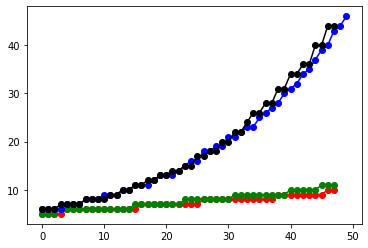

In [35]:
time00 = adj_data[(adj_data['Z'] == 0) & (adj_data['X'] == 0)].sort_values(by='Y', ascending=True)['Y']
time01 = adj_data[(adj_data['Z'] == 0) & (adj_data['X'] == 1)].sort_values(by='Y', ascending=True)['Y']
time10 = adj_data[(adj_data['Z'] == 1) & (adj_data['X'] == 0)].sort_values(by='Y', ascending=True)['Y']
time11 = adj_data[(adj_data['Z'] == 1) & (adj_data['X'] == 1)].sort_values(by='Y', ascending=True)['Y']

plt.plot(range(len(time00)), time00, 'r-o')
plt.plot(range(len(time01)), time01, 'g-o')
plt.plot(range(len(time10)), time10, 'b-o')
plt.plot(range(len(time11)), time11, 'k-o')

---

# Survival Analysis with CoxPHFitter

In [36]:
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

In [37]:
data_without_sex = adj_data[['X', 'Y', 'status']].copy()
data_without_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
X         194 non-null float64
Y         194 non-null float64
status    194 non-null float64
dtypes: float64(3)
memory usage: 4.7 KB


In [38]:
cph = CoxPHFitter()
cph.fit(data_without_sex, 'Y', 'status', show_progress=True)
cph.print_summary()

Iteration 3: norm_delta = 0.00000, step_size = 0.9500, ll = -831.51764, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 3 iterations.
<lifelines.CoxPHFitter: fitted with 194 total observations, 0 right-censored observations>
             duration col = 'Y'
                event col = 'status'
   number of observations = 194
number of events observed = 194
   partial log-likelihood = -831.52
         time fit was run = 2020-03-29 01:46:26 UTC

---
    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
X   0.00       1.00       0.14            -0.28             0.28                 0.76                 1.33

     z    p   -log2(p)
X 0.02 0.99       0.02
---
Concordance = 0.49
Log-likelihood ratio test = 0.00 on 1 df, -log2(p)=0.02
